## **Customer Segmentation using K-Means Clustering**

> Indented block



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [30]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
import pandas as pd
dataset = pd.read_excel('/content/gdrive/MyDrive/online_retail.xlsx')


##Data Set Information:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


##Attribute Information:

**InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.<br>
**StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.<br>
**Description**: Product (item) name. Nominal.<br>
**Quantity**: The quantities of each product (item) per transaction. Numeric.<br>
**InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.<br>
**UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).(<font color="Red">1 Pound sterling equals 96.22 Indian Rupee </font>)<br>
**CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.<br>
**Country**: Country name. Nominal. The name of the country where a customer resides.

In [ ]:
dataset.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'month_year'],
      dtype='object')

In [ ]:
dataset.shape

(525461, 8)

In [ ]:
dataset.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [10]:
print("Number of customers are ",len(dataset["Customer ID"].value_counts()))

Number of customers are  4314


In [32]:
print(dataset.isnull().sum())
dataset = dataset.dropna()
print(dataset.isnull().sum())
print(dataset.shape)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
(417534, 8)


In [33]:
dataset = dataset[(dataset['Quantity']>0)]

In [34]:
dataset.describe()

,Quantity,Price,Customer ID
count,407695.000000,407695.000000,407695.000000
mean,13.586686,3.294188,15368.504107
std,96.842229,34.756655,1679.795700
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


In [35]:
Country_quantity = dataset["Country"].value_counts()
Country_quantity

United Kingdom          370951
EIRE                      8507
Germany                   7661
France                    5470
Netherlands               2730
Spain                     1235
Switzerland               1170
Belgium                   1038
Portugal                   984
Sweden                     868
Channel Islands            821
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
Norway                     365
Finland                    347
United Arab Emirates       315
Unspecified                277
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65
Brazil  

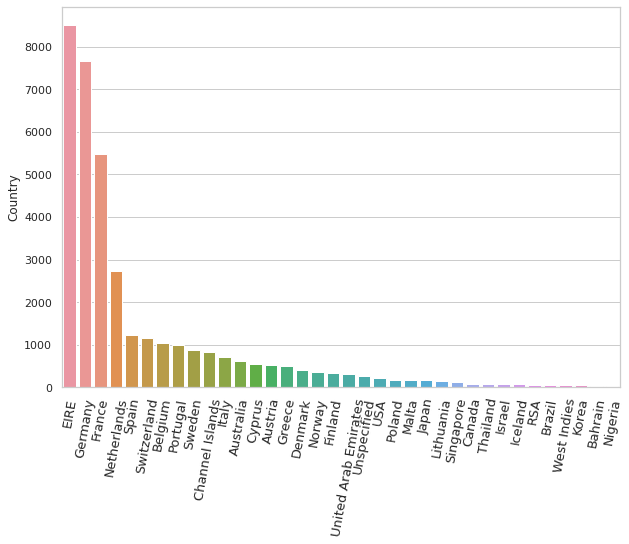

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=80,size=13)
sns.barplot(x=Country_quantity.index[1:], y=Country_quantity[1:])
plt.show()

In [37]:
import datetime as dt
# month_info = pd.DataFrame(dataset['InvoiceDate'].dt.month)
# year_info = pd.DataFrame(dataset['InvoiceDate'].dt.year)
# new = pd.concat([month_info,year_info],axis=1)
#temp = pd.to_datetime(month_info,year_info.assign(Day=1))
#temp= pd.to_datetime(dataset[['year', 'month']].assign(Day=1))
# dataset['revenue'] = dataset['Price'] * dataset['Quantity']
temp = list(map(lambda x: x.strftime("%Y-%m"),dataset["InvoiceDate"].copy()))
#temp = pd.to_datetime(dataset["InvoiceDate"].copy(),format="%Y-%m-%d")
dataset["month_year"] = temp

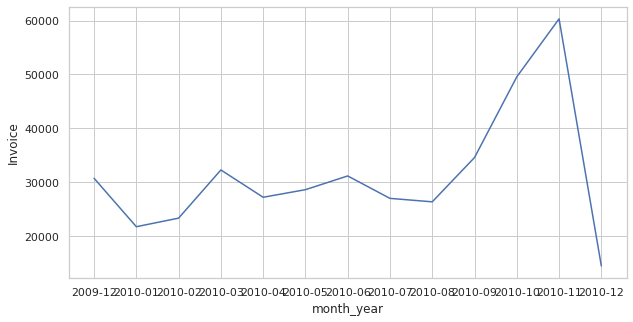

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plot = pd.DataFrame(dataset.groupby(['month_year'])['Invoice'].count()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="month_year", y="Invoice", data = plot)
plt.show()

In [23]:
dataset["revenue"] = dataset["Price"]*dataset["Quantity"]
dataset["revenue"]

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: revenue, Length: 407695, dtype: float64

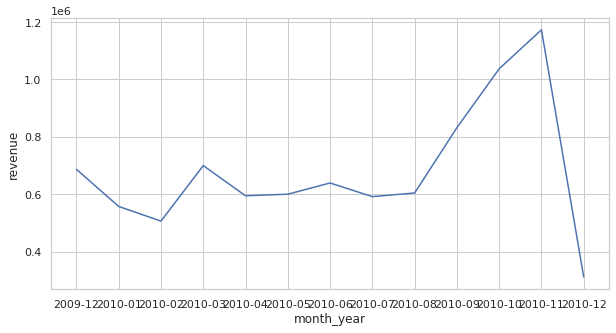

In [ ]:
data_temp = pd.DataFrame(dataset.groupby(['month_year'])['revenue'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = 'month_year', y='revenue', data = data_temp)

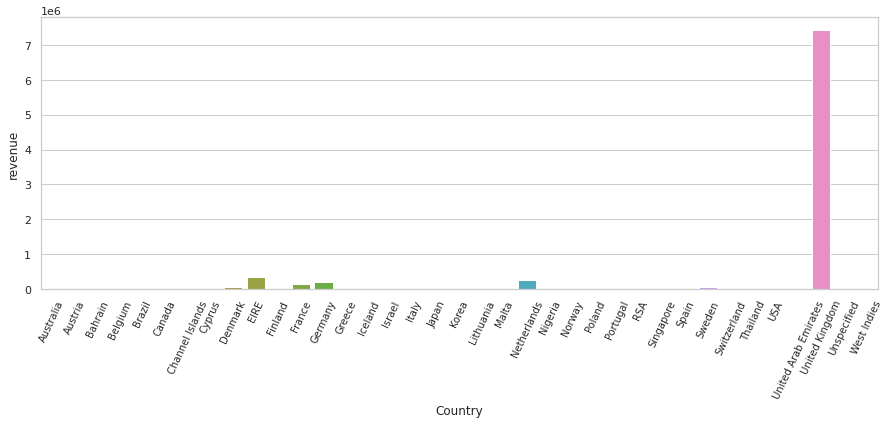

In [ ]:
data_temp2 = pd.DataFrame(dataset.groupby(['Country'])['revenue'].sum()).reset_index()
plt.figure(figsize=(15,5))
ax=sns.barplot(x='Country', y='revenue',data=data_temp2)
plt.xticks(rotation=65,size=10)
plt.show()

In [ ]:
dataset.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'month', 'year', 'month_year',
       'revenue'],
      dtype='object')

## RFM Analysis:
- R (Recency) - most recent purchase
- F (Frequency) - how frequent is the purchase
- M (Monetary) - amount spent in each purchase

In [26]:
dataset['Customer ID'] = dataset['Customer ID'].astype(str)
dataset['Amount'] = dataset['Quantity']*dataset['Price']
rfm_dataset_monetary = dataset.groupby('Customer ID')['Amount'].sum()
rfm_dataset_monetary.reset_index()
rfm_dataset_monetary.columns = ['Customer ID', 'Amount']
print(rfm_dataset_monetary)

Customer ID
12346.0     372.86
12347.0    1323.32
12348.0     222.16
12349.0    2671.14
12351.0     300.93
            ...   
18283.0     641.77
18284.0     461.68
18285.0     427.00
18286.0    1296.43
18287.0    2345.71
Name: Amount, Length: 4314, dtype: float64


In [ ]:
rfm_dataset_frequency =  dataset[['Customer ID','Invoice']].groupby(['Customer ID','Invoice']).count()
rfm_dataset_frequency = rfm_dataset_frequency.reset_index().groupby(["Customer ID"]).count().reset_index()
rfm_dataset_frequency.columns = ['Customer ID', 'Frequency']
print(rfm_dataset_frequency)

     Customer ID  Frequency
0        12346.0         11
1        12347.0          2
2        12348.0          1
3        12349.0          3
4        12351.0          1
...          ...        ...
4309     18283.0          6
4310     18284.0          1
4311     18285.0          1
4312     18286.0          2
4313     18287.0          4

[4314 rows x 2 columns]


In [38]:
dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(dataset['InvoiceDate'])
dataset['Diff'] = max_date - dataset['InvoiceDate']
rfm_dataset_recency = dataset.groupby('Customer ID')['Diff'].min()
rfm_dataset_recency = rfm_dataset_recency.reset_index()
rfm_dataset_recency.columns = ['Customer ID','Diff']
rfm_dataset_recency['Diff'] = rfm_dataset_recency['Diff'].dt.days
print(rfm_dataset_recency)

      Customer ID  Diff
0         12346.0   164
1         12347.0     2
2         12348.0    73
3         12349.0    42
4         12351.0    10
...           ...   ...
4309      18283.0    17
4310      18284.0    66
4311      18285.0   295
4312      18286.0   111
4313      18287.0    17

[4314 rows x 2 columns]


In [ ]:
rfm_dataset_final = pd.merge(rfm_dataset_monetary,rfm_dataset_frequency,on='Customer ID',how='inner')
rfm_dataset_final = pd.merge(rfm_dataset_final,rfm_dataset_recency,on='Customer ID',how='inner')
rfm_dataset_final.columns = ['Customer ID', 'Amount', 'Frequency', 'Recency']
print(rfm_dataset_final)

     Customer ID   Amount  Frequency  Recency
0        12346.0   372.86         11      164
1        12347.0  1323.32          2        2
2        12348.0   222.16          1       73
3        12349.0  2671.14          3       42
4        12351.0   300.93          1       10
...          ...      ...        ...      ...
4309     18283.0   641.77          6       17
4310     18284.0   461.68          1       66
4311     18285.0   427.00          1      295
4312     18286.0  1296.43          2      111
4313     18287.0  2345.71          4       17

[4314 rows x 4 columns]


In [ ]:
rfm_dataset_final.shape

(4314, 4)

In [ ]:
Q1 = rfm_dataset_final.Amount.quantile(0.05)
Q3 = rfm_dataset_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Amount >= Q1 - 1.5*IQR) & (rfm_dataset_final.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm_dataset_final.Recency.quantile(0.05)
Q3 = rfm_dataset_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Recency >= Q1 - 1.5*IQR) & (rfm_dataset_final.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm_dataset_final.Frequency.quantile(0.05)
Q3 = rfm_dataset_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_dataset_final = rfm_dataset_final[(rfm_dataset_final.Frequency >= Q1 - 1.5*IQR) & (rfm_dataset_final.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
X = rfm_dataset_final[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
rfm_dataset_scaled = scaler.fit_transform(X)

In [ ]:
rfm_dataset_scaled = pd.DataFrame(rfm_dataset_scaled)
rfm_dataset_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_dataset_scaled.head()

,Amount,Frequency,Recency
0,0.024629,0.370370,0.439678
1,0.087409,0.037037,0.005362
2,0.014674,0.000000,0.195710
3,0.176437,0.074074,0.112601
4,0.019877,0.000000,0.026810


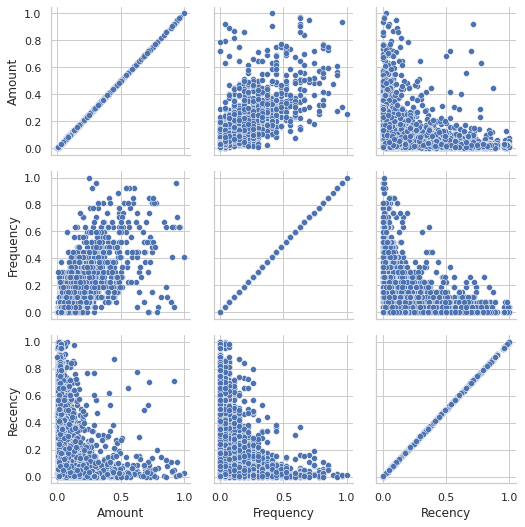

In [ ]:
g = sns.PairGrid(rfm_dataset_scaled)
g.map(sns.scatterplot);


## Segmentation based on Amount,Recency and Frequency

In [ ]:
within_sum_square = []
range_n_clusters = [i for i in range(2,11)]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, init ='k-means++', max_iter=300,random_state=42).fit(rfm_dataset_scaled)
    within_sum_square.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_dataset_scaled, cluster_labels)
    # c_avg = calinski_harabasz_score(rfm_dataset_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5661945492047095
For n_clusters=3, the silhouette score is 0.5477575520199691
For n_clusters=4, the silhouette score is 0.4743336103129437
For n_clusters=5, the silhouette score is 0.4377793045333027
For n_clusters=6, the silhouette score is 0.3880489018428877
For n_clusters=7, the silhouette score is 0.381351139040909
For n_clusters=8, the silhouette score is 0.387409124390399
For n_clusters=9, the silhouette score is 0.37027024047295526
For n_clusters=10, the silhouette score is 0.35262500025185517


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300,init="k-means++",random_state=42)
kmeans.fit(rfm_dataset_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

[1 0 0 ... 1 0 0]


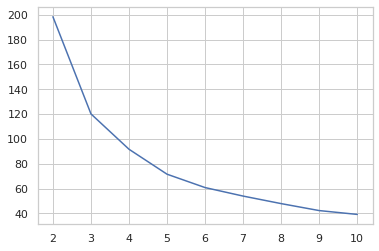

In [ ]:
plt.plot(range_n_clusters,within_sum_square)
plt.show()

In [ ]:
rfm_dataset_final['Cluster_Id'] = lbs
rfm_dataset_final.head()

,Customer ID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,372.86,11,164,1
1,12347.0,1323.32,2,2,0
2,12348.0,222.16,1,73,0
3,12349.0,2671.14,3,42,0
4,12351.0,300.93,1,10,0


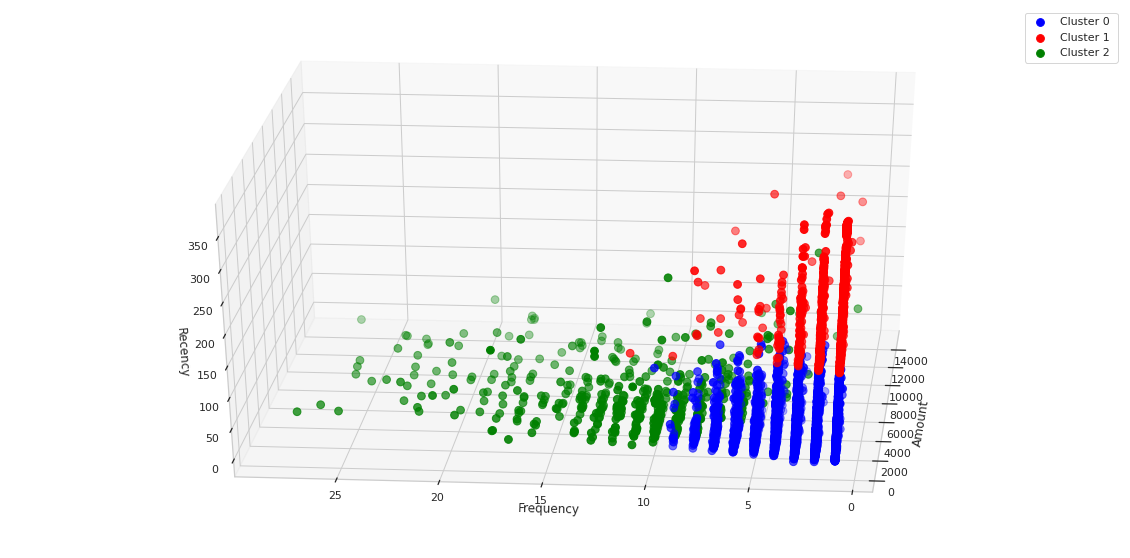

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 0], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 0],  rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 0], c='blue', s=60)
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 1], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 1], rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 1], c='red', s=60)
ax.scatter(rfm_dataset_final["Amount"][rfm_dataset_final.Cluster_Id == 2], rfm_dataset_final["Frequency"][rfm_dataset_final.Cluster_Id == 2], rfm_dataset_final["Recency"][rfm_dataset_final.Cluster_Id == 2], c='green', s=60)
ax.view_init(30, 185)
plt.legend(("Cluster 0 ","Cluster 1","Cluster 2"))
plt.xlabel("Amount")
plt.ylabel("Frequency")
ax.set_zlabel('Recency')
plt.show()

## Segmentation based on Amount and Frequency

In [ ]:
rfm_dataset_af = rfm_dataset_scaled[["Amount","Frequency"]].copy()
rfm_dataset_af

,Amount,Frequency
0,0.024629,0.370370
1,0.087409,0.037037
2,0.014674,0.000000
3,0.176437,0.074074
4,0.019877,0.000000
...,...,...
4232,0.042391,0.185185
4233,0.030495,0.000000
4234,0.028205,0.000000
4235,0.085633,0.037037


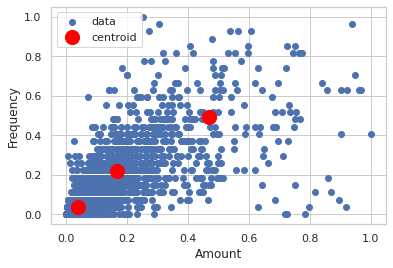

In [ ]:
d2kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 100)              # Maximum number of iterations            )               # Choose random state for reproducibility

pred_y =d2kmeans.fit_predict(rfm_dataset_af)


# Plot the data
plt.scatter(rfm_dataset_scaled["Amount"], 
            rfm_dataset_scaled["Frequency"])

# Plot the clusters 
plt.scatter(d2kmeans.cluster_centers_[:, 0], 
            d2kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')
plt.legend(["data","centroid"])          
plt.xlabel("Amount")
plt.ylabel("Frequency")                 # Set centroid color
plt.show()

In [ ]:
#pred_y
rfm_copy = rfm_dataset_af.copy()
rfm_copy["Cluster_Id"]= pred_y
rfm_copy.head()

,Amount,Frequency,Cluster_Id
0,0.024629,0.370370,1
1,0.087409,0.037037,0
2,0.014674,0.000000,0
3,0.176437,0.074074,0
4,0.019877,0.000000,0


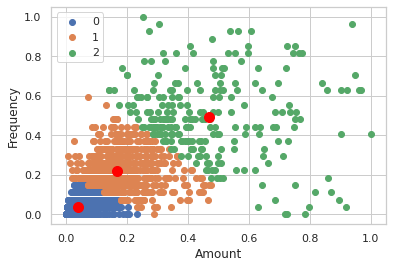

In [ ]:
u_labels = np.unique(pred_y)
 
#plotting the results:

for i in u_labels:
    plt.scatter(rfm_copy[pred_y == i]['Amount'] ,rfm_copy[pred_y==i]['Frequency'],label=i)
plt.scatter(d2kmeans.cluster_centers_[:, 0], 
            d2kmeans.cluster_centers_[:, 1], 
            s=100,                             # Set centroid size
            c='red') 
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Frequency") 
plt.show()

## Plots that summarize the Output

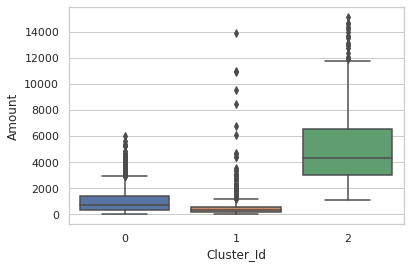

In [ ]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_dataset_final)
plt.show()

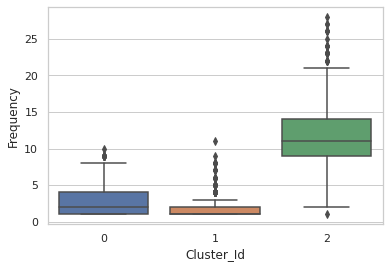

In [ ]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_dataset_final)
plt.show()

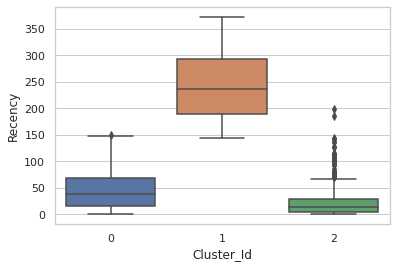

In [ ]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_dataset_final)
plt.show()